# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Цели и задачи проекта

Цели:

- Сравнить среднее время активности пользователей в Москве и Санкт-Петербурге

- Проверить статистическую значимость различий

- Выявить возможные причины обнаруженных различий

Задачи:

- Загрузить и предобработать данные

- Провести описательный анализ выборок

- Выполнить статистическую проверку гипотез

- Интерпретировать результаты

- Сформулировать выводы и рекомендации

## Описание данных

Таблица с пользователями ``

- `puid` — идентификатор пользователя.

- `city` — город.

- `hours` — длительность чтения или прослушивания в часах.

## Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Проверка гипотезы в Python
3. Аналитическая записка


## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла ``.

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [3]:
display(df)

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434
...,...,...,...,...
8779,8779,Санкт-Петербург,1130000028554332,4.107774
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841


In [4]:
duplicates_count = df.duplicated(subset=['puid']).sum()# находим дубликаты в индетификаторах пользователей
print(duplicates_count)

244


In [5]:
df = df.drop_duplicates(subset=['puid'])


In [6]:
group_size = df['city'].value_counts()# Сравниваем размеры групп
print(group_size)

Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64


Дубликатов и пропусков в данных нет. Размеры групп сильно различаются.

## 2. Проверка гипотезы в Python


- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [7]:
# Фильтрация данных по Москве и СПб
msk = df[df['city'] == 'Москва']['hours']
spb = df[df['city'] == 'Санкт-Петербург']['hours']

# Описательная статистика
print("Москва (среднее):", msk.mean())
print("СПб (среднее):", spb.mean())

Москва (среднее): 10.88109206345796
СПб (среднее): 11.264433367029522


In [8]:
# перед t-тестом убедимся, что данные распределены нормально
_, p_msk = st.shapiro(msk)
_, p_spb = st.shapiro(spb)

print("p-значение (Москва):", p_msk)
print("p-значение (СПб):", p_spb)

p-значение (Москва): 0.0
p-значение (СПб): 0.0


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
# тест Манна-Уитни
u_stat, p_value = st.mannwhitneyu(spb, msk, alternative='greater')
print("U-статистика:", u_stat)
print("p-значение:", p_value)

U-статистика: 7157178.5
p-значение: 0.6189600878052618


Так как при проверке тестом Шапиро-Уилка мы получили, что данные распределены не нормально, то мы использовали тест Манна-Уитни и получили p_value = 0,089 и следовательно недостаточно оснований отвергнуть H₀ и разница статистически незначима. Если в одной или обеих группах есть сильный разброс значений (например, часть пользователей читает 1 час, а часть — 20 часов), тест Манна-Уитни может "не замечать" различий из-за перекрывающихся распределений.

# Часть 2. Анализ результатов A/B-тестирования

**Данные**

** — таблица участников тестов.**

Структура файла:

- `user_id` — идентификатор пользователя;

- `group` — группа пользователя;

- `ab_test` — название теста;

- `device` — устройство, с которого происходила регистрация.

** — архив с одним csv-файлом, в котором собраны события 2020 года;**

Структура файла:

- `user_id` — идентификатор пользователя;

- `event_dt` — дата и время события;

- `event_name` — тип события;

- `details` — дополнительные данные о событии.

In [10]:
participants = pd.read_csv('')
events = pd.read_csv('',
                     parse_dates=['event_dt'], low_memory=False)

In [11]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [12]:
display(participants)

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
...,...,...,...,...
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC


In [13]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [14]:
display(events)

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN
...,...,...,...,...
787281,1A655C280B064708,2020-12-31 23:57:44,product_page,NaN
787282,B77B2F4BCA134618,2020-12-31 23:58:23,registration,0.0
787283,GLOBAL,2020-12-31 23:58:30,product_cart,NaN
787284,B12AD1623E494FAD,2020-12-31 23:58:34,registration,-6.52


Данные в порядке, только в таблице `events` есть пропуски в столбце `details`, но это не критично так как это столбец с дополнительной информацией.

In [15]:
# проверка названий теста и групп
print("Уникальные тесты:", participants['ab_test'].unique())
print("Группы в тесте:", participants[participants['ab_test'] == 'interface_eu_test']['group'].unique())

# Фильтрация данных только для нужного теста
df = participants[participants['ab_test'] == 'interface_eu_test']

Уникальные тесты: ['interface_eu_test' 'recommender_system_test']
Группы в тесте: ['B' 'A']


Распределение по группам (%):
 B    50.387097
A    49.612903
Name: group, dtype: float64


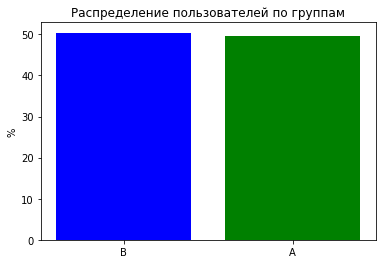

In [16]:
# Распределение пользователей по группам
group_distribution = df['group'].value_counts(normalize=True) * 100
print("Распределение по группам (%):\n", group_distribution)

# Визуализация
plt.bar(group_distribution.index, group_distribution.values, color=['blue', 'green'])
plt.title('Распределение пользователей по группам')
plt.ylabel('%')
plt.show()

In [17]:
# Поиск пользователей в нескольких тестах
user_multiple_tests = participants.groupby('user_id')['ab_test'].nunique()
overlapping_users = user_multiple_tests[user_multiple_tests > 1].index

print(f"Пользователей в нескольких тестах: {len(overlapping_users)}")
if len(overlapping_users) > 0:
    print("Примеры:", overlapping_users[:5])

Пользователей в нескольких тестах: 887
Примеры: Index(['001064FEAAB631A1', '00341D8401F0F665', '0082295A41A867B5',
       '00E68F103C66C1F7', '00EFA157F7B6E1C4'],
      dtype='object', name='user_id')


Название и группы соответствуют ТЗ. В таблице `ab_test_participants` пользователи равномерно разделены разделены на две группы А и В для двух тестов, а также есть пересечения между этими тестами, 887 пользователей учавствуют в нескольких тестах.

In [18]:
# Оставляем только пользователей из теста interface_eu_test
test_users = participants[participants['ab_test'] == 'interface_eu_test']['user_id']
events_filtered = events[events['user_id'].isin(test_users)]

# Проверка
print(f"Участников теста: {len(test_users)}")
print(f"Событий в отфильтрованных данных: {len(events_filtered)}")

Участников теста: 10850
Событий в отфильтрованных данных: 79715


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [19]:
# Находим первое событие каждого пользователя (дату регистрации)
registration_dates = events_filtered.groupby('user_id')['event_dt'].min().reset_index()
registration_dates.columns = ['user_id', 'registration_dt']

# Добавляем дату регистрации к основному датафрейму
lifetime = events_filtered.merge(registration_dates, on='user_id')

# Преобразуем в datetime
lifetime['event_dt'] = pd.to_datetime(lifetime['event_dt'])
lifetime['registration_dt'] = pd.to_datetime(lifetime['registration_dt'])

In [20]:
# Вычисляем разницу в днях между событием и регистрацией
lifetime['days_after_reg'] = (lifetime['event_dt'] - lifetime['registration_dt']).dt.days

# Проверяем распределение
print("Распределение событий по дням после регистрации:")
print(lifetime['days_after_reg'].value_counts().sort_index())

Распределение событий по дням после регистрации:
0     41039
1      8659
2      5965
3      4421
4      3501
5      2961
6      2403
7      2111
8      1708
9      1342
10     1214
11      815
12      756
13      644
14      540
15      446
16      340
17      225
18      193
19      210
20      103
21       80
22       39
Name: days_after_reg, dtype: int64


In [21]:
# Оставляем только события первых 7 дней
lifetime_7days = lifetime[(lifetime['days_after_reg'] <= 7) & (lifetime['days_after_reg'] > 0)]
# Проверяем результат
print(f"\nВсего событий: {len(lifetime)}")
print(f"Событий в первые 7 дней: {len(lifetime_7days)}")
print(f"Процент событий в первые 7 дней: {len(lifetime_7days)/len(lifetime)*100:.1f}%")


Всего событий: 79715
Событий в первые 7 дней: 30021
Процент событий в первые 7 дней: 37.7%


In [29]:
# Код ревьюера
(lifetime_7days.event_dt - lifetime_7days.registration_dt).max()

Timedelta('7 days 23:58:41')

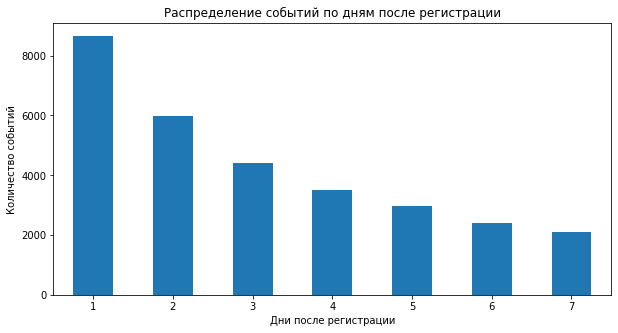

In [23]:
plt.figure(figsize=(10, 5))
lifetime_7days['days_after_reg'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение событий по дням после регистрации')
plt.xlabel('Дни после регистрации')
plt.ylabel('Количество событий')
plt.xticks(rotation=0)
plt.show()

In [24]:
p1 = 0.30  # Конверсия группы A
p2 = 0.33  # Конверсия группы B
alpha = 0.05
power = 0.80

# Критические значения Z-статистики
Z_alpha = st.norm.ppf(1 - alpha/2)  # 1.96 для α=5%
Z_beta = st.norm.ppf(power)         # 0.84 для мощности 80%

# Промежуточные расчеты
p = (p1 + p2) / 2
effect_size = abs(p1 - p2)

n = ((Z_alpha * math.sqrt(2*p*(1-p)) + Z_beta * math.sqrt(p1*(1-p1) + p2*(1-p2))) ** 2) / (effect_size ** 2)

print(f"Минимальный размер выборки на группу: {math.ceil(n)}")

Минимальный размер выборки на группу: 3763


In [25]:
# Фильтрация участников нужного теста
test_users = participants[participants['ab_test'] == 'interface_eu_test']

# Определение уникальных покупателей
purchases = events[events['event_name'] == 'purchase']
unique_buyers = purchases['user_id'].unique()

# Соединение данных с пометкой покупателей
merged_data = test_users.merge(
    events[['user_id']].drop_duplicates(),
    on='user_id',
    how='left',
    indicator='has_events'
)

# Расчет метрик по группам
results = test_users.groupby('group').agg(
    total_visitors=('user_id', 'nunique'),
    unique_buyers=('user_id', lambda x: x.isin(unique_buyers).sum())
).reset_index()

# Расчет конверсии
results['conversion_rate'] = (results['unique_buyers'] / results['total_visitors'] * 100).round(2)

# Вывод результатов
print("Корректные результаты A/B-теста:")
print(results.to_string(index=False))

Корректные результаты A/B-теста:
group  total_visitors  unique_buyers  conversion_rate
    A            5383           1766            32.81
    B            5467           1931            35.32


Рост конверсии +2.51 процентных пункта и увеличение числа покупателей на 165 пользователей, что несоответствует запланированному росту в 3 пп, поэтому нам предстоит опредилить статистическую значимость.

## 4. Проведите оценку результатов A/B-тестирования:

**Нулевая гипотеза (H₀):**

**- Упрощение интерфейса не приводит к статистически значимому увеличению конверсии.**

**Альтернативная гипотеза (H₁):**

**- Упрощение интерфейса увеличивает конверсию как минимум на 3 процентных пункта.**

In [27]:
from statsmodels.stats.proportion import proportions_ztest

count = [1766, 1931]  # Число успехов (покупок)
nobs = [5383, 5467]    # Общий размер групп
z_stat, p_value = proportions_ztest(count, nobs, alternative='smaller')

print(f"Z-статистика: {z_stat:}")
print(f"P-value: {p_value:}")

Z-статистика: -2.7625081602852286
P-value: 0.0028679563964638466


P-value = 0.0029 после проверки статистическим тестом, следовательно мы отвергаем нулевую гипотезу. Изменения интерфейса доказали свою эффективность, но есть потенциал для дополнительной оптимизации. Рекомендуется внедрить новую версию, параллельно запустив цикл непрерывных улучшений на основе собранных данных.